## Introduction to Divide and Conquer

Divide and conquer is a fundamental algorithmic paradigm used to solve complex problems efficiently. The main idea is to break a problem into smaller subproblems, solve each subproblem independently, and then combine their solutions to solve the original problem.

### Steps in Divide and Conquer

1. **Divide:** Split the problem into two or more smaller subproblems.
2. **Conquer:** Solve each subproblem recursively. If the subproblem is small enough, solve it directly.
3. **Combine:** Merge the solutions of the subproblems to get the solution to the original problem.

### Examples

- **Merge Sort:** Divides the array into halves, sorts each half, and merges them.
- **Quick Sort:** Divides the array based on a pivot, sorts each partition recursively.
- **Binary Search:** Divides the search space in half at each step.

### Advantages

- Reduces problem complexity.
- Enables efficient recursive solutions.
- Often leads to optimal time complexity.

Divide and conquer is widely used in computer science for designing efficient algorithms and is a key concept for mastering algorithmic problem-solving.

### Linear Search

Linear search is a classic algorithm that follow the, following general pattern

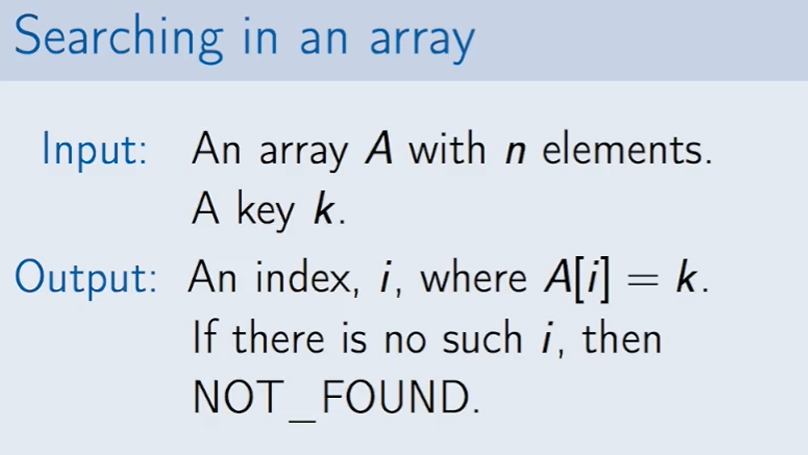

It's an good idea to define a **recurrence relation** which is an equation recursively defining a sequence of values. Linear search has the worst recurrence definition *T(n) = T(n -1) + c*, where c is some constant. The base case T(0) = 1. 

## Binary search

One way we can improve a searching algorithm, is to be able to divide and conquer the search. If the list is ordered like a dictionary, then we can keep dividing the search into a subproblem. With an ordered array we can calculate the midpoint. 

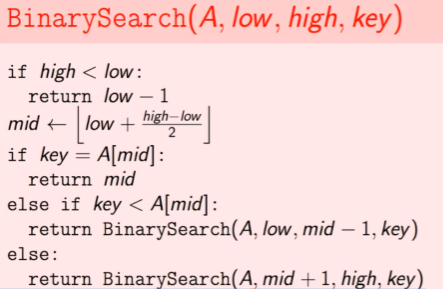

As an example: 

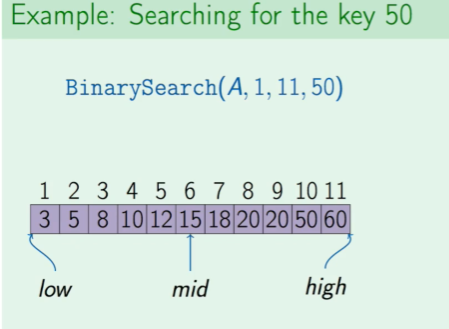


An iterative version can also be created similarly to the recursive one, but this will not use the stack.

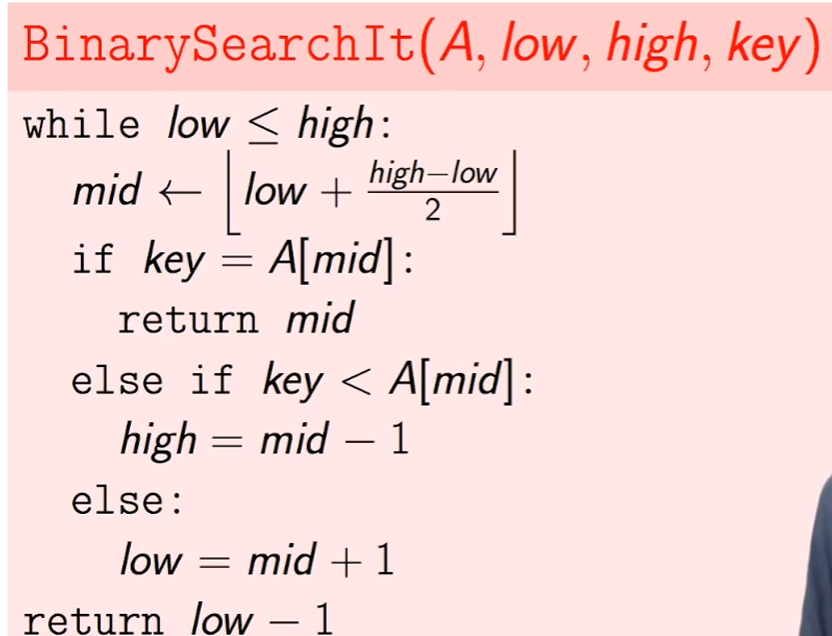


**Binary search runtime**

The binary search algortihm keeps cutting the problem in half. With a list of *n* numbers, we keep splitting the problem until *n* = 1. 

* with step 1, the problem shrinks to *n/2* 
* with step 2, the problems shrinks to *n/4*
* with step k, the problem shrinks to *n/2<sup>k</sup>*

That is the intuition and the rare insight you need to grasp. Now we keep solving this until there is one element left at the worst case. 

 If *k* is the number of steps then $$ \frac{n}{2^k} = 1 $$

There is an mathematical function that express this exact pattern and solving for the number of steps *k* in the worst case gives us the *k = log<sub>2</sub>(n)*, and therefore the run time is log<sub>2</sub>(n) for binary search, much better than for linear. 

This graph shows the relationship between number of steps and n in a logarithmic function

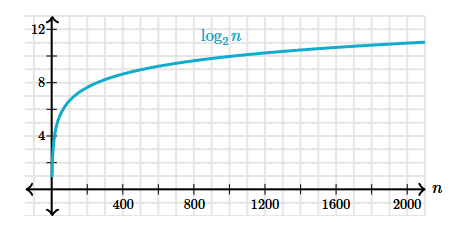

### Polynomial Multiplication

Another divide-and-conquer algorithm is to solve polynomial multiplication. As an example consider the two polynomials A and B. The resulting answer becomes C = (15,13,33,9,10)

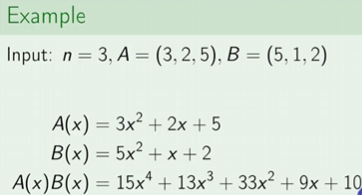

* The 15<sup>4</sup> comes from multiplying the 3x<sup>2</sup> and 5x<sup>2</sup>
* The 10 comes from multiplying 5 with 2
* The 13x<sup>3</sup> comes from (3x<sup>2</sup> times x) + (2x times 5x<sup>2</sup>)
* The 33x<sup>2</sup> comes from 5 times 5 + 3 times 2 + 2 times 1.


A naive algorithm may look like this:

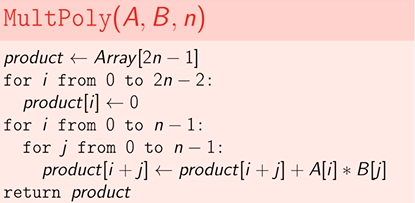

The run-time will be O(n<sup>2</sup>) as we have a for loop that runs through the entire set terms and runs a nested for loop for each to calculate the terms.

A divide-and-conquer algorithm requires a insight into the problem at hand. It turns out we can split up the calculations of A and B into D<sub>1</sub>, D<sub>0</sub> and E<sub>1</sub>, E<sub>0</sub> each representing the first and second half of the entire polynomial. Then we calculate subproducts and finally sum those terms up

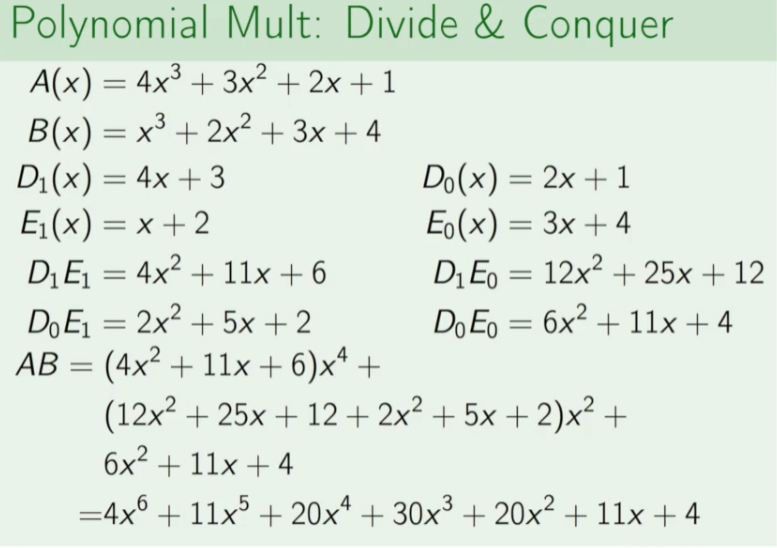


### Recap

The Main Idea
If you want to solve a problem using a divide-and-conquer strategy, you
have to think about the following three steps:
1. Breaking a problem into smaller subproblems.
2. Solving each subproblem recursively.
3. Combining a solution to the original problem out of solutions to sub-problems.

The frst two steps is the “divide” part, whereas the last step is the “conquer”
part. We illustrate this approach with a number of problems of progressing
difculty and then proceed to the programming challenges.

The **guessing game** is a good example of challenge that can be solved using divide and conquer strategies. With each guess, we have broken down the problem into a smaller one

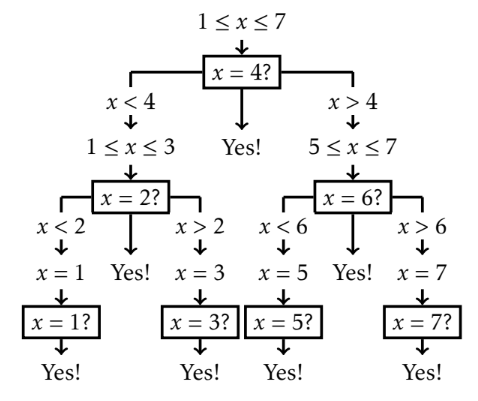

In [33]:
def binary_search_with_duplicates(integers, target, low=None, high=None):
    '''
    Binary search algorithm that handles duplicates.
    Input: A sorted array of integers (possibly with duplicates)
    and an integer target.
    Output: Index of the first occurrence of target in the array or -1
    if target does not appear in the array.
    1. Find the middle point of the array.
    2. If the middle point is equal to the integer, check if there are duplicates
    to the left of the middle point. If there are, return the index of the first
    occurrence of the integer.
    3. If the middle point is less than the integer, search the right half of
    the array.
    4. If the middle point is greater than the integer, search the left half of
    the array.
    5. If the integer is not found, return -1.
    6. Repeat steps 1-5 until the integer is found or the array is empty.
    7. If the array is empty, return -1.
    '''
    
    # Initialize bounds if not provided
    if low is None:
        low = 0
    if high is None:
        high = len(integers) - 1
    
    # Base case: invalid range
    if low > high:
        return -1
    
    # Calculate middle point
    middle_point = (low + high) // 2
    
    if integers[middle_point] == target:
        # Found the target, but we need to find the first occurrence
        # Check if this is the first occurrence or if we need to search left
        if middle_point == 0 or integers[middle_point - 1] != target:
            # This is the first occurrence
            return middle_point
        else:
            # There are duplicates to the left, search the left half
            return binary_search_with_duplicates(integers, target, low, middle_point - 1)
    elif integers[middle_point] < target:
        # Target is in the right half
        return binary_search_with_duplicates(integers, target, middle_point + 1, high)
    else:
        # Target is in the left half
        return binary_search_with_duplicates(integers, target, low, middle_point - 1)

### Majority Element
Check whether a given sequence of numbers contains an element
that appears more than half of the times.
* Input: A sequence of n integers.
* Output: 1, if there is an element that is repeated more than n/2
times, and 0 otherwise.


In [18]:
def majority_element(integers):
    output = 0
    sorted_integers = sorted(integers)
    i = 1 
    for n in sorted_integers:
        if n == integers[i]:
            output = 1
            break
        else:
            i += 1

    return output


### Randomized quick sort 
Sort a given sequence of numbers (that may contain duplicates)
using a modifcation of RandomizedQuickSort that works in
O(nlogn) expected time.
* Input: An integer array with n elements that may contain duplicates.
* Output: Sorted array (generated using a modifcation
of RandomizedQuickSort) that works in O(nlogn) expected
time.


In [19]:
import random 
def randomized_quick_sort(integers):

    '''
    Divide and conquer algorithm that sorts an array in O(n log n) time on average.
    1. Choose a pivot element from the array.
    2. Partition the array into two sub-arrays: elements less than or equal to the pivot and elements greater than the pivot.
    3. Recursively apply the same logic to the left and right sub-arrays.
    4. Combine the sorted sub-arrays and the pivot to get the final sorted array.
    5. Return the sorted array.
    '''
    # if integer is empty, return empty array
    if not integers:
        return []
    
    # if integer has one element, return the array
    if len(integers) == 1:
        return integers

    # choose a random pivot element

    pivot = random.choice(integers)
    less_than_pivot = [x for x in integers if x < pivot]
    equal_to_pivot = [x for x in integers if x == pivot]
    greater_than_pivot = [x for x in integers if x > pivot]

    # recursively apply the same logic to the left and right sub-arrays
    return randomized_quick_sort(less_than_pivot) + equal_to_pivot + randomized_quick_sort(greater_than_pivot)

In [20]:
randomized_quick_sort([3,6,8,10,1,2,1])

[1, 1, 2, 3, 6, 8, 10]

### Number of Inversions
Compute the number of inversions in a sequence of integers.
* Input: A sequence of n integers a1,...,an.
* Output: The number of inversions in the sequence, i.e., the
number of indices i < j such that ai > aj

This problem requires us to compare each element and all the previous elements counting up how many of those are larger than the current element.

Example:

Input = [3,2,5,9,4]

Output = 3

To implement this one way is to loop over each integer, then nesting a loop that runs from the start of the list to where it is positioned counting up every time an bigger integer is encountered.

In [5]:
def number_of_inversions(integers):
    num_of_inversions = 0

    for n in range(1, len(integers)):
        for i in range(0, n):
            if integers[i] > integers[n]:
                num_of_inversions = num_of_inversions + 1
    return num_of_inversions 

In [7]:
number_of_inversions([3,2,5,9,4,1])

8

### Points and segments

Given a set of points and a set of segments on a line, compute, for
each point, the number of segments it is contained in.
* Input: A list of segments and a list of points.
* Output: The number of segments containing each point.

Example

Inputs = [1,4,5,3,4]

segments = [(1,3), (4,6)]

output = [1,1,1,1,1]

In this example each point is found only in one of the segments and no points lives outside any segment. One way to solve this is to loop for each point in the inputs and then somehow check if the number lies between any two ends of a segment, thus looping over each segment and appending the count to a list holding the out.

In [9]:
def points_and_segments(points, segments):

    output = []

    for p in points:
        p_count = 0
        for segment in segments:
            if p >= segment[0] and p<= segment[1]:
                p_count += 1
        output.append(p_count)
    return output

In [11]:
points_and_segments([1,4,5,3,4,7], [(1,3), (4,6)])

[1, 1, 1, 1, 1, 0]

### Closest points
Find the closest pair of points in a set of points on a plane.
* Input: A list of n points on a plane.
* Output: The minimum distance between a pair of these points.

Example:

Inputs = [(1,1), (1,3), (2,5), (3,4)]

output = 2

For example the points (1,1) and (1,3) have the distance x<sub>1</sub> - x<sub>2</sub> + y<sub>1</sub> - y<sub>2</sub> here 2 since the distance between the y coordinates are is two.

In [16]:
import random

def closest_points(points):

    point_one = random.choice(points)
    print(point_one)
    points.pop(points.index(point_one))
    print(points)
    point_two = random.choice(points)
    print(point_two)

    distance_x = point_one[0] - point_two[0]
    distance_y = point_one[1] - point_two[1]

    total_distance = abs(distance_x+distance_y)

    return total_distance



In [17]:
closest_points([(1,1), (1,3), (2,5), (3,4)])

(1, 3)
[(1, 1), (2, 5), (3, 4)]
(3, 4)


3